In [11]:
import pandas as pd               # библиотека для работы с таблицами
import numpy as np                # библиотека для работы с матрицами
from sklearn import metrics       # подгружаем метрики
import matplotlib.pyplot as plt

In [12]:
myData = pd.read_csv('mycar.csv')

In [51]:
# У нас здесь всего два признака: один из них будет зависимой переменной, а другой — независимой.
# Обозначим их:
X = myData.iloc[:,:-1].values
Y = myData.iloc[:,1].values

In [50]:
# Для начала нам необходимо разделить выборку (то есть все наши объекты) на обучающую и тестовую. Давайте разберемся, зачем это нужно.
# Дело в том, что нам не столько важно, насколько успешно будет алгоритм давать предсказания на наших данных, сколько важно, 
# чтобы он показывал хорошие результаты на реальных данных, «в бою». Можно привести следующую аналогию: обучающая выборка — это тренировочные примеры для нашего алгоритма, 
# а тестовая — экзаменационные.
# Обычно выборка делится на обучающую и тестовую не в равных долях: на обучающую  мы берем 70-80 % наблюдений, а на тестовую — 20-30 % наблюдений.
# Подгрузим нужную функцию для разбиения:
from sklearn.model_selection import train_test_split

In [49]:
# Теперь с помощью этой функции мы получаем независимые и зависимые переменные из обучающей и тестовой выборки. Размер тестовой выборки задаем 0,3.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.3)

In [16]:
# Теперь обучим модель:
from sklearn.linear_model import LinearRegression
myModel = LinearRegression() #Обозначаем, что наша модель - линейная регрессия
myModel.fit(X_train,Y_train) #обучаем модель на обучающих данных

LinearRegression()

In [17]:
# Итак, модель обучена. Что теперь?
# Теперь можем попробовать предсказать значения зависимой переменной для тестовой выборки:
y_pred = myModel.predict(X_test)
y_pred

array([40.83798683, 33.82109155, 72.41401563, 37.32953919, 40.83798683,
       75.92246327, 30.3126439 , 26.80419626, 47.85488212, 37.32953919,
       19.78730097, 68.90556799, 40.83798683, 16.27885333, 58.38022505])

In [18]:
y_happy = [4,20,110,15,23]
y_happy_pred = [5,15,100,9,21]

In [19]:
#Вычисляем MAE:

MAE = metrics.mean_absolute_error(y_happy, y_happy_pred)
print(MAE)

4.8


In [20]:
#Вычисляем MSE:

MSE = metrics.mean_squared_error(y_happy, y_happy_pred)
print(MSE)

33.2


In [21]:
#Вычисляем коэффициент детерминации:

R_2 = metrics.r2_score(y_happy, y_happy_pred)
print(R_2)

0.9774247946472284


In [23]:
value_target = [2,3,-1,4]
value_target_pred = [1,3,2,5]
val_MSE = metrics.mean_squared_error(value_target, value_target_pred)
print(val_MSE)

2.75


In [24]:
# Чему равен коэффициент детерминации на этих данных?
metrics.r2_score(value_target, value_target_pred)

0.2142857142857143

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [27]:
data = pd.read_csv('data_flats2.csv', sep =';')
data.head()

,id,full_sq,life_sq,floor,preschool_education_centers_raion,school_education_centers_raion,school_education_centers_top_20_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,...,shopping_centers_raion,metro_km_walk,kindergarten_km,school_km,park_km,green_zone_km,mkad_km,bulvar_ring_km,kremlin_km,price_doc
0,1,43,27.0,4.0,5,5,0,0,7,3,...,16,1.131260,0.145700,0.177975,2.158587,0.600973,1.422391,13.675657,15.156211,5850000
1,2,34,19.0,3.0,5,8,0,0,6,1,...,3,0.635053,0.147754,0.273345,0.550690,0.065321,9.503405,8.132640,8.698054,6000000
2,3,43,29.0,2.0,4,7,0,0,5,1,...,0,1.445960,0.049102,0.158072,0.374848,0.453172,5.604800,8.054252,9.067885,5700000
3,4,89,50.0,9.0,9,10,0,0,17,6,...,11,0.963802,0.179441,0.236455,0.078090,0.106125,2.677824,18.309433,19.487005,13100000
4,5,77,77.0,4.0,7,9,0,2,25,2,...,10,0.688859,0.247901,0.376838,0.258289,0.236214,11.616653,0.787593,2.578671,16331452


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30469 entries, 0 to 30468
Data columns (total 21 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     30469 non-null  int64  
 1   full_sq                                30469 non-null  int64  
 2   life_sq                                24086 non-null  float64
 3   floor                                  30302 non-null  float64
 4   preschool_education_centers_raion      30469 non-null  int64  
 5   school_education_centers_raion         30469 non-null  int64  
 6   school_education_centers_top_20_raion  30469 non-null  int64  
 7   university_top_20_raion                30469 non-null  int64  
 8   sport_objects_raion                    30469 non-null  int64  
 9   additional_education_raion             30469 non-null  int64  
 10  culture_objects_top_25_raion           30469 non-null  int64  
 11  sh

In [29]:
# количество пропусков
data.isnull().sum()

id                                          0
full_sq                                     0
life_sq                                  6383
floor                                     167
preschool_education_centers_raion           0
school_education_centers_raion              0
school_education_centers_top_20_raion       0
university_top_20_raion                     0
sport_objects_raion                         0
additional_education_raion                  0
culture_objects_top_25_raion                0
shopping_centers_raion                      0
metro_km_walk                              25
kindergarten_km                             0
school_km                                   0
park_km                                     0
green_zone_km                               0
mkad_km                                     0
bulvar_ring_km                              0
kremlin_km                                  0
price_doc                                   0
dtype: int64

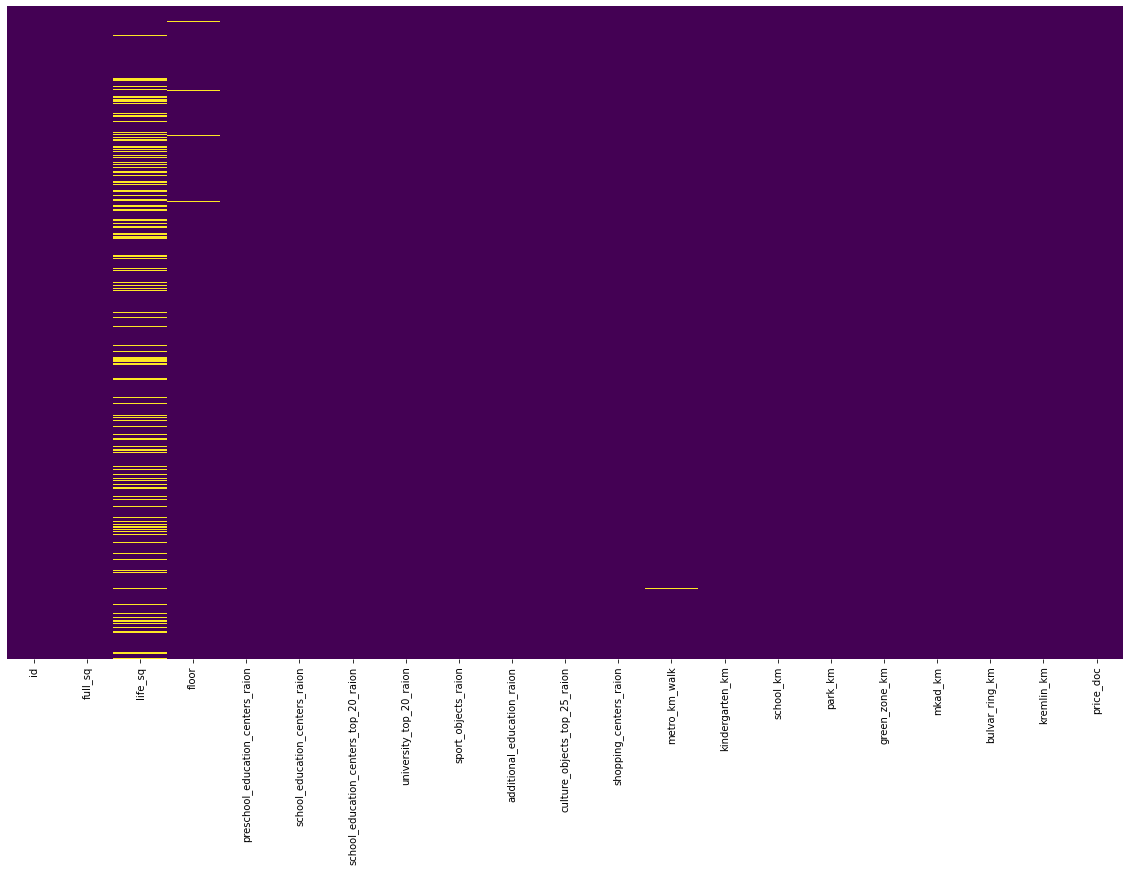

In [30]:
# можно оценить визуально количество пропусков и их распределение

import seaborn as sns
fig, ax = plt.subplots(figsize=(20,12))
sns_heatmap = sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

<AxesSubplot:>

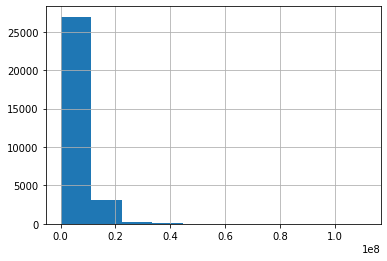

In [31]:
# распределение нашей целевой переменной и понять, какие значения мы будем предсказывать
data.price_doc.hist()

<AxesSubplot:>

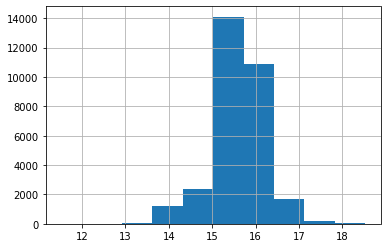

In [32]:
# У нашего распределения есть проблема — слишком сильный перепад. Много квартир в среднем сегменте, 
# но очень мало дорогих квартир. На практике часто в таких случаях логарифмируют переменную, чтобы уменьшить перепады и сгладить хвост.
data['price_doc'] = data['price_doc'].apply(lambda w: np.log(w + 1))
data.price_doc.hist()

<AxesSubplot:>

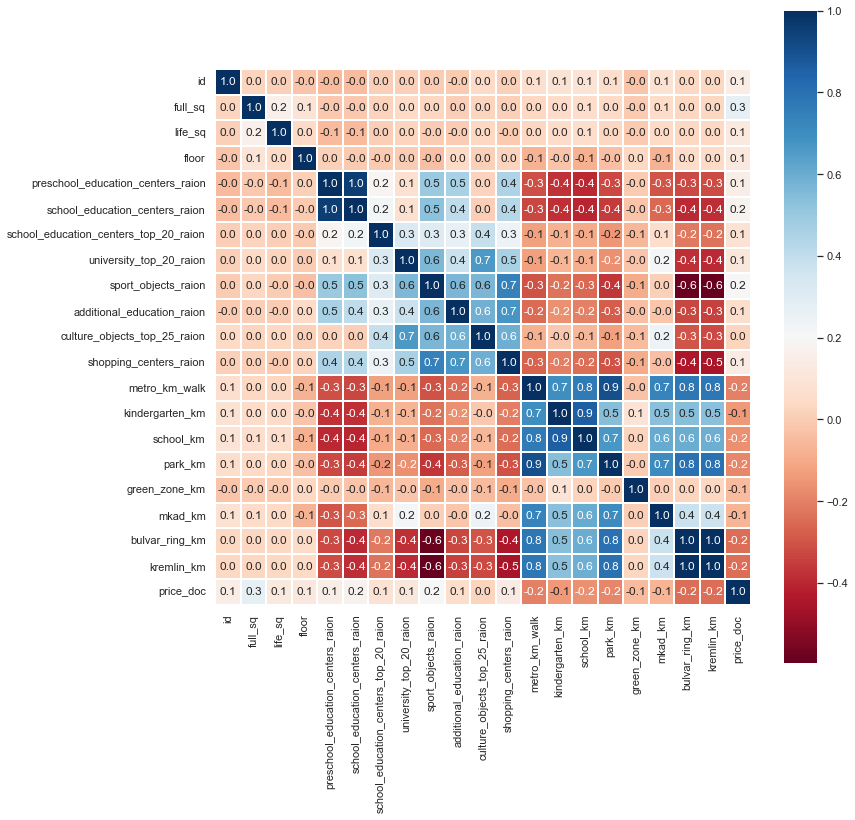

In [33]:
# Теперь займемся отбором признаков.  Для начала нам надо проверить, нет ли мультиколлинеарности — сильной взаимосвязи между независимыми признаками. 
# Для этого построим матрицу корреляций для признаков
sns.set(font_scale=1)
plt.subplots(figsize=(12, 12))
sns.heatmap(data.corr(), square=True,
              annot=True, fmt=".1f", linewidths=0.1, cmap="RdBu")


In [34]:
data.head()

,id,full_sq,life_sq,floor,preschool_education_centers_raion,school_education_centers_raion,school_education_centers_top_20_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,...,shopping_centers_raion,metro_km_walk,kindergarten_km,school_km,park_km,green_zone_km,mkad_km,bulvar_ring_km,kremlin_km,price_doc
0,1,43,27.0,4.0,5,5,0,0,7,3,...,16,1.131260,0.145700,0.177975,2.158587,0.600973,1.422391,13.675657,15.156211,15.581952
1,2,34,19.0,3.0,5,8,0,0,6,1,...,3,0.635053,0.147754,0.273345,0.550690,0.065321,9.503405,8.132640,8.698054,15.607270
2,3,43,29.0,2.0,4,7,0,0,5,1,...,0,1.445960,0.049102,0.158072,0.374848,0.453172,5.604800,8.054252,9.067885,15.555977
3,4,89,50.0,9.0,9,10,0,0,17,6,...,11,0.963802,0.179441,0.236455,0.078090,0.106125,2.677824,18.309433,19.487005,16.388123
4,5,77,77.0,4.0,7,9,0,2,25,2,...,10,0.688859,0.247901,0.376838,0.258289,0.236214,11.616653,0.787593,2.578671,16.608603


In [94]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


# Load data
data = pd.read_csv('data_flats2.csv', sep=';')

# Logarithm the 'price_doc'
data['price_doc'] = data['price_doc'].apply(lambda w: np.log(w + 1))

# Drop useless features and rows with nulls
data.drop(['id', 'preschool_education_centers_raion', 'kremlin_km',
          'kindergarten_km', 'park_km', 'life_sq'], axis=1, inplace=True)

data.dropna(axis=0, inplace=True)
# Create X and Y
X = data.drop(['price_doc'], axis=1)
Y = data['price_doc']

# Split X and Y (train and test parts)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=77)

# Preprocessing X
scaler = RobustScaler()
X_train_transformed = scaler.fit_transform(X_train)
X_test_transformed = scaler.transform(X_test)

# Train model
model = LinearRegression().fit(X_train_transformed, Y_train)

# Get the prediction
Y_pred = model.predict(X_test_transformed)

# Fix Y after logarithm
Y_test = np.exp(Y_test) - 1 
Y_pred = np.exp(Y_pred) - 1 

# Calculation MSE
MSE = int(np.around(mean_squared_error(Y_test, Y_pred), 0))
print(f'my MSE = {MSE}, correct MSE = 16647931507747 or 16818684371715')

my MSE = 16818684371715, correct MSE = 16647931507747 or 16818684371715
